**ПРАКТИЧЕСКАЯ РАБОТА 11. МЕТРИЧЕСКИЕ МЕТОДЫ КЛАССИФИКАЦИИ**


Коршиков Иван Сергеевич ПИН-б-о-22-1 09.03.03 Прикладная информатика

Цели и задачи Цель лабораторной работы: изучение принципов построения информационных систем с использованием метрических методов классификации. Основные задачи: – изучение инструментария Python для реализации алгоритмов метрической классификации; – изучение методов оптимизации параметров метрической классификации; – освоение модификаций kNN-метода.



Примеры представляют собой положительные и отрицательные случаи, когда людям выдавали и не выдавали кредит.

Теория была разработана на основе бесед с сотрудниками японской компании, которая выдаёт кредиты.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
data_source = '/content/crx.data'
d = pd.read_table(data_source, delimiter=',', names= ['A1', 'A2', 'A3',
                                                       'A4', 'A5',
                                                    'A6','A7','A8', 'A9', 'A10', 'A11',
                                                      'A12', 'A13', 'A14', 'A15','A16',])
d.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


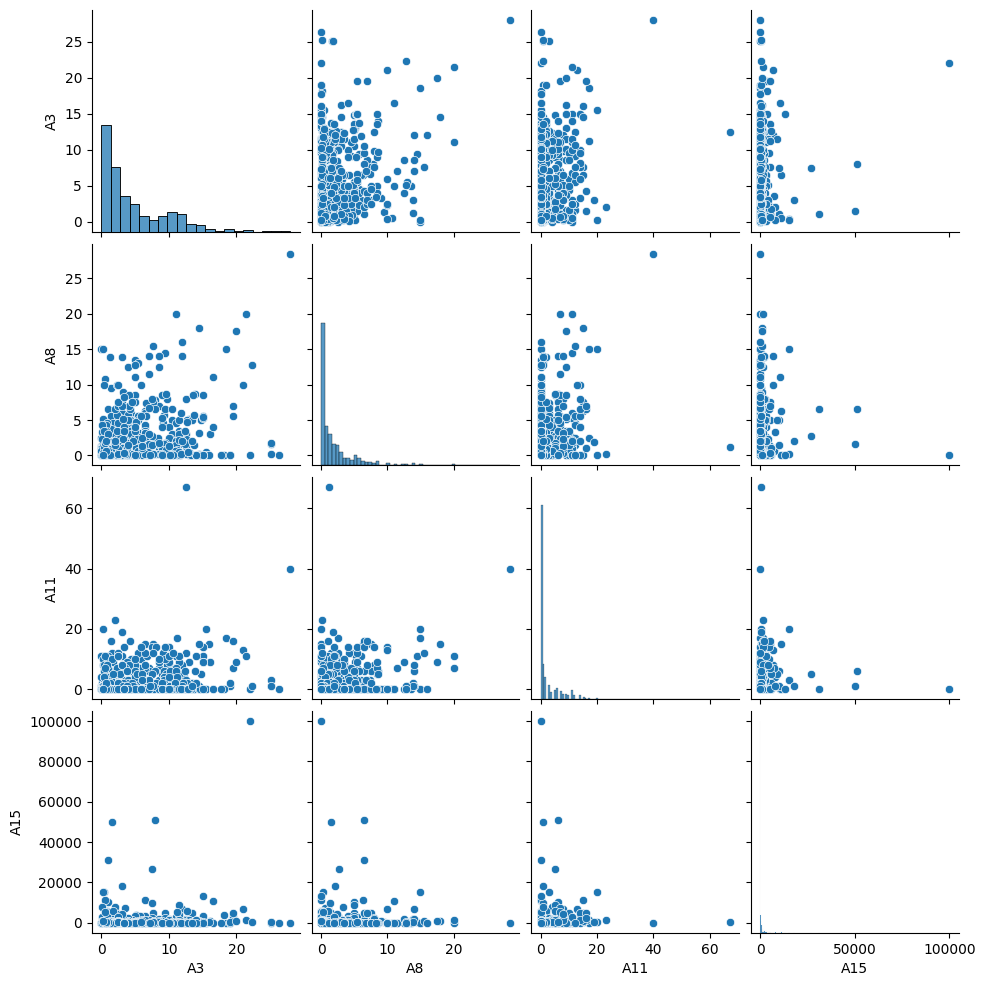

In [ ]:
sb.pairplot(d)

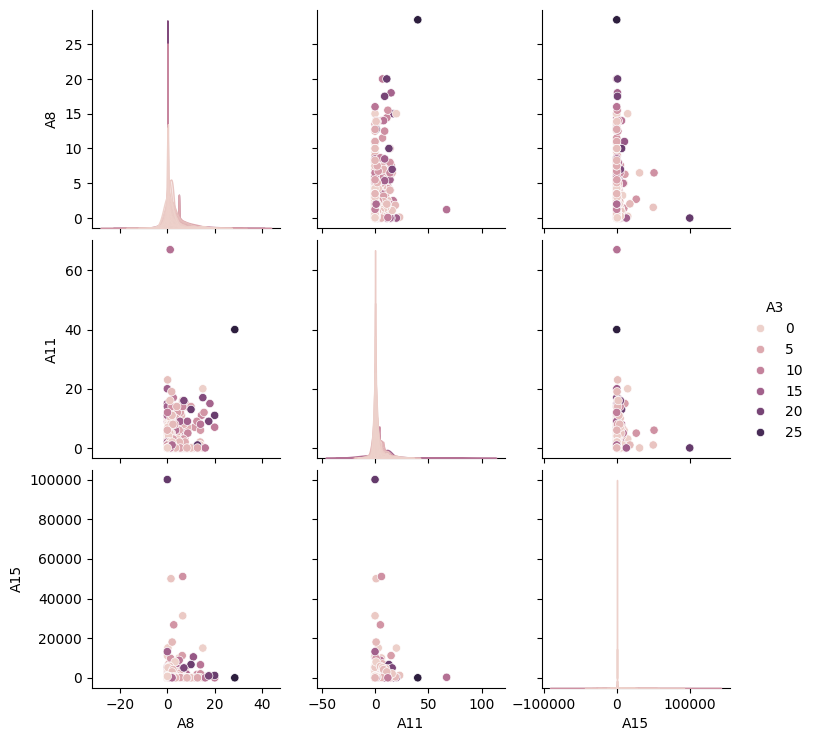

In [ ]:
sb.pairplot(d, hue='A3')

Теперь можно построить модель классификатора используя метод KNN и метрику точности

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train = d[['A3', 'A8']]
Y_train = d['A15']


A3    0
A8    0
dtype: int64


In [ ]:
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, Y_train, Y_holdout = train_test_split(d[['A3', 'A8']],
                d['A15'],
                test_size=0.3,
                random_state=17)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(Y_holdout, knn_pred)
print("acc = ", accur)

acc =  0.3333333333333333


Получили значение точности 0.33333333333. Чтобы оптимизировать алгоритм классификации нужно менять значение соседей K. Для нахождения оптимального значения K построимм график точности от K.

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:

import numpy as np
import pandas as pd

#Assuming 'd' is your Pandas DataFrame

k_list = list(range(1, 50))
cv_scores = []
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d[['A3', 'A8']], d['A15'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


In [ ]:
MSE = [1-x for x in cv_scores]

Text(0, 0.5, 'Ошибка')

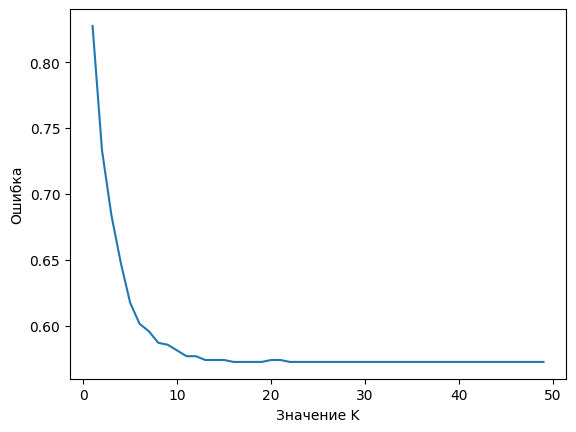

In [ ]:

plt.plot(k_list, MSE)
plt.xlabel("Значение K")
plt.ylabel("Ошибка")

In [ ]:
k_min = min(MSE)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])
print("Все оптимальные значения K: ", all_k_min)

Все оптимальные значения K:  [16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


Получили значение для K равным 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, при котором классификатор наиболее точно выполняет свою работу